# competition 2 scatch notebooks

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats
sns.set()
%matplotlib inline
from Modules import read_data


In [2]:
df , y = read_data('../default_of_credit_card_clients.xls')
df.head()


ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})

df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,0,1,0,0,1,1,0


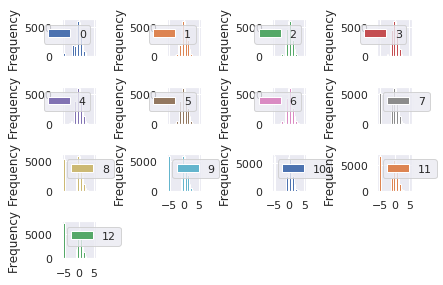

In [4]:
from sklearn.preprocessing import QuantileTransformer


transform_columns = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#create transformer object
quantile_transformer = QuantileTransformer(
        output_distribution='normal', random_state=2019)

#fit to the data
transform_columns_df = quantile_transformer.fit_transform(df[transform_columns])


#plot the results
pd.DataFrame(transform_columns_df).plot(kind = 'hist', subplots = True, bins = 20, layout = (4,4))
plt.tight_layout()


#bill_columns_transformer = Pipeline(steps = [])

In [5]:
#replace the old columns in df with the newly transformed columns

df.loc[:, ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = transform_columns_df

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,-1.649237,24,2,2,-1,-1,-2,-2,-0.648811,-0.666412,...,-5.199338,-5.199338,1,1,0,0,0,1,1,0
2,-0.130848,26,-1,2,0,0,0,2,-0.748892,-0.803280,...,-5.199338,0.177827,1,1,0,0,0,1,0,1
3,-0.329548,34,0,0,0,0,0,0,0.140851,-0.222909,...,-0.249721,0.826698,0,1,0,0,0,1,0,1
4,-0.842694,37,0,0,0,0,0,0,0.393435,0.450791,...,-0.161281,-0.221344,0,1,0,0,0,1,1,0
5,-0.842694,57,-1,0,-1,0,0,0,-0.407018,-0.515425,...,-0.434928,-0.403356,0,0,1,0,0,1,1,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit(df))

df = scaler.transform(df)

df = pd.DataFrame(df)

df.columns =['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married']

df.head()



MinMaxScaler(copy=True, feature_range=(0, 1))


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,Y,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
0,0.341399,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.437606,0.435914,...,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.487417,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.427982,0.422752,...,0.000000,0.517101,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.468309,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.513545,0.478564,...,0.475985,0.579500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.418961,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.537835,0.543351,...,0.484490,0.478714,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.418961,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.460859,0.450434,...,0.458175,0.461211,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Here we will build a baseline model, in which we will oversample the target feature to ensure balance in its classes. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = df.drop('Y', axis = 1)
y = df['Y']
X.head()

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2019)

#begin oversampling
oversample = pd.concat([X_train,y_train],axis=1)
max_size = oversample['Y'].value_counts().max()
lst = [oversample]

for class_index, group in oversample.groupby('Y'):
        lst.append(group.sample(max_size-len(group), replace=True))
X_train = pd.concat(lst)
y_train=pd.DataFrame.copy(X_train['Y'])
del X_train['Y']

In [ ]:
#establish baseline model to tweak
from sklearn.metrics import classification_report, accuracy_score

clf = SVC()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

In order to try and make a better model, we will try a random search of hyperparameters of a Random Forest to see what values our random search yields. From there, we can then use a narrower Grid search to find our best performing model, which will be our model to help find the best features.

In [21]:
# set up random search

from sklearn.model_selection import RandomizedSearchCV

#define number of trees 
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]

#define number of features to use at every split
max_features = ['auto', .60]

#define max depth in trees
max_depth = [int(t) for t in np.linspace(start = 10, stop = 100, num = 10)]

#define min number of samples to split a node
min_samples_split = [2, 5, 8]

#define min number of samples at each leaf node
min_samples_leaf = [1, 2, 4]

#define method of sample selection for each tree
bootstrap = [True, False]


#create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
                }



In [22]:

#perform the random seach, using 3-fold cross_validation
#we'll search over 100 different combinations

clf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                              n_iter = 100, cv = 3,
                               random_state = 2019, n_jobs = -1
                              )

#fit the model
rf_random.fit(X, y)



KeyboardInterrupt: 

From the UCI dataset website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005;
- X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 